In [2]:
# TODOs and ideas:
# 1. percentage of covered area



import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.size"] = 16
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
madison = pd.read_csv("../../../../data/FTA/madison_data.csv")
revenue = pd.read_csv("../../../../data/FTA/revenue.csv").T
expense = pd.read_csv("../../../../data/FTA/expense.csv").T

# transpose and rename columns
revenue.rename(columns=revenue.iloc[0], inplace=True)
revenue.drop(revenue.index[0], inplace=True)

# transpose and rename columns
expense.rename(columns=expense.iloc[0], inplace=True)
expense.drop(expense.index[0], inplace=True)

expense

,salaries_wages_benefits,materials_supplies,purchased_transportation,other_operating_expenses
2010,36554849,4475605,4277587,2182410
2011,37008463,5528433,4254722,1979569
2012,36338977,5708273,4307438,1838241
2013,37678785,5667697,4462664,2137982
2014,38852886,6506463,4598846,2050379
2015,39948738,6410547,4685519,2193730
2016,42430006,6503633,4688858,3264249
2017,43584469,5430356,4931813,4533569
2018,42880871,4471356,3286906,3944876
2019,41942742,4990000,3401145,4478786


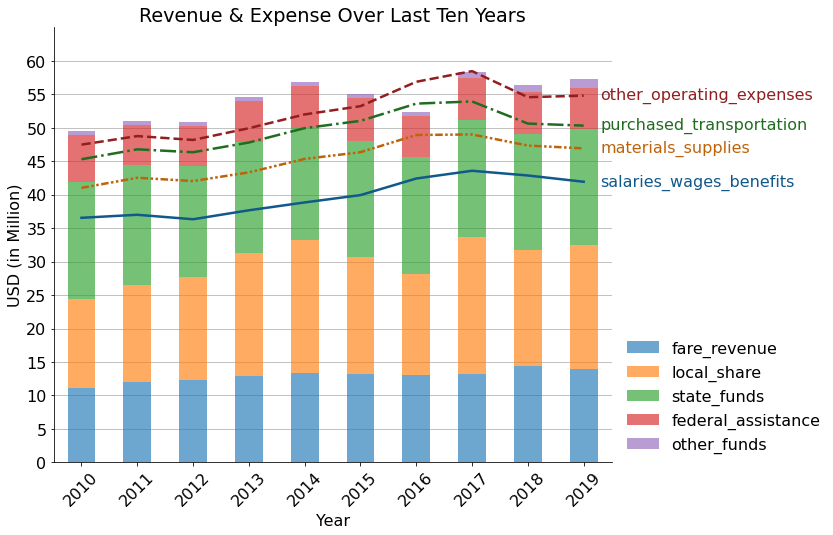

In [112]:
fig, ax = plt.subplots(figsize=(10, 8))
# -------------------------------- ax1 --------------------------------
revenue.plot.bar(ax=ax, stacked=True, zorder=2, alpha=0.65)

plt.xticks(rotation=45)
ax.set_xlabel("Year")

ax.set_ylim((0, 65 * 1e6))
ax.set_yticks(np.arange(0, 65, 5) * 1e6)
ax.set_yticklabels(map(str, np.arange(0, 65, 5)))
ax.set_ylabel("USD (in Million)")

# -------------------------------- ax2 --------------------------------

# first col
plt.plot(expense.index, expense["salaries_wages_benefits"], zorder=5, c="#11598b", linewidth=2.5)  # darker blue
ax.text(ax.get_xlim()[1] - 0.2, expense.iloc[-1, 0], expense.columns[0], va="center", ha="left", c="#11598b")

# first + second col
plt.plot(expense.index, expense["salaries_wages_benefits"] + expense["materials_supplies"], zorder=5, c="#bd640b", linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth=2.5)
ax.text(ax.get_xlim()[1] - 0.2, expense.iloc[-1, 0] + expense.iloc[-1, 1], expense.columns[1], va="center", ha="left", c="#bd640b")

# first + second + third col
plt.plot(expense.index, expense["salaries_wages_benefits"] + expense["materials_supplies"] + expense["purchased_transportation"], zorder=5, c="#206d20", linestyle="-.", linewidth=2.5)
ax.text(ax.get_xlim()[1] - 0.2, expense.iloc[-1, 0] + expense.iloc[-1, 1] + expense.iloc[-1, 2], expense.columns[2], va="center", ha="left", c="#206d20")

# first + second + third + forth col
plt.plot(expense.index, expense["salaries_wages_benefits"] + expense["materials_supplies"] + expense["purchased_transportation"] + expense["other_operating_expenses"], zorder=5, c="#921e1f", linestyle="--", linewidth=2.5)
ax.text(ax.get_xlim()[1] - 0.2, expense.iloc[-1, 0] + expense.iloc[-1, 1] + expense.iloc[-1, 2] + expense.iloc[-1, 3], expense.columns[3], va="center", ha="left", c="#921e1f")


ax.set_title("Revenue & Expense Over Last Ten Years")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.grid(axis='y', color='0.7', zorder=-3)
plt.legend(loc="center right", frameon=False, bbox_to_anchor=(1.4, 0.15))

plt.savefig("1019-3.png", dpi=300, bbox_inches = "tight")

0.7324022201206167

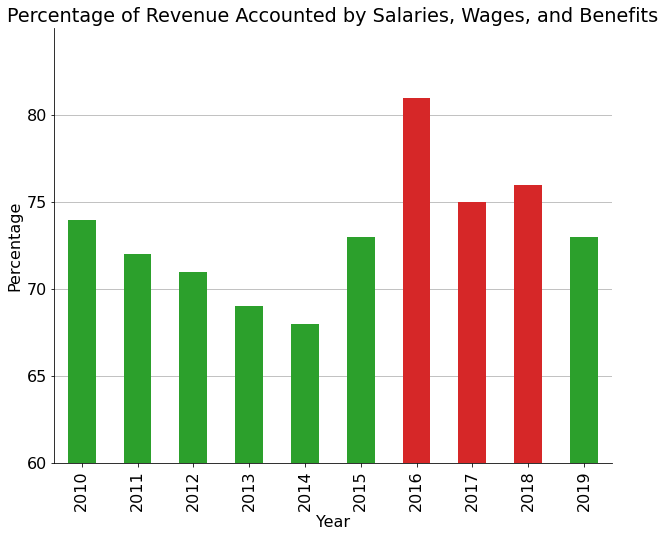

In [221]:
swb = (expense["salaries_wages_benefits"] / revenue.sum(axis=1) - 0.6)
colors = ["#2ca02c" if round(val, 2) < 0.15 else "#d62728" for val in swb.values]
rounding = [round(val, 2) for val in swb.values]
df = pd.DataFrame(swb, columns=["perc"], index=list(swb.index))
df["c"] = colors
df["rounding"] = rounding
df = df.drop(["perc"], axis=1)

fig, ax = plt.subplots(figsize=(10, 8))
df["rounding"].plot.bar(ax=ax, color=df["c"], zorder=2)
ax.set_ylim((0, 0.25))
ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
ax.set_yticklabels(["60", "65", "70", "75", "80"])
ax.grid(axis='y', color='0.7', zorder=-3)
ax.set_ylabel("Percentage")
ax.set_xlabel("Year")
ax.set_title("Percentage of Revenue Accounted by Salaries, Wages, and Benefits")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig("1019-4.png", dpi=300)

(expense["salaries_wages_benefits"] / revenue.sum(axis=1)).mean()

In [ ]:
# Find correlation
# is there a correlation between